<a href="https://colab.research.google.com/github/Elisha-Hart/Access-The-String-Using-Slicing-And-Indexing-Assignment/blob/main/Vectorization_Techniques_Precision_Recall_ROC_AUC_Naive_Bayes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1403]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [1404]:
# Import libraries Continued
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd


In [1405]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import collections
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns 

In [1406]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [1407]:
from scipy import stats as st
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB

In [1408]:
data = pd.read_csv('/content/Tamil_first_ready_for_sentiment.csv.zip', on_bad_lines='skip')

In [1409]:
### Data Quality Checking
def quality_check(data):
  print("Data Information Is :", data.info())
  print("Data Description Is :", data.describe())
  print("Data columns are : ", data.columns)
  print("The null counts are: ", data.isnull().sum())

In [1410]:
print("The quality report of the data is as follows \n", quality_check(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14840 entries, 0 to 14839
Data columns (total 1 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Negative 	 Enna da ellam avan seyal  Mari iruku  14840 non-null  object
dtypes: object(1)
memory usage: 116.1+ KB
Data Information Is : None
Data Description Is :        Negative \t Enna da ellam avan seyal  Mari iruku
count                                             14840
unique                                            14703
top                   Positive \t Kajal  Fans Subscribe
freq                                                  7
Data columns are :  Index(['Negative \t Enna da ellam avan seyal  Mari iruku'], dtype='object')
The null counts are:  Negative \t Enna da ellam avan seyal  Mari iruku    0
dtype: int64
The quality report of the data is as follows 
 None


In [1411]:
data.columns

Index(['Negative \t Enna da ellam avan seyal  Mari iruku'], dtype='object')

In [1412]:
data.head()

,Negative \t Enna da ellam avan seyal Mari iruku
0,Negative \t This movei is just like ellam ava...
1,Positive \t Padam vanthathum 13k dislike potta...
2,Positive \t Neraya neraya neraya... ... V era ...
3,Positive \t wow thavala sema mass....padam oru...
4,Negative \t Andha 19 k unlike panavangaluku ko...


In [1413]:
data.tail()

,Negative \t Enna da ellam avan seyal Mari iruku
14835,Mixed_feelings \t ivaru cinemala laam nalla th...
14836,Positive \t Pattaya Kilaputhupaa trailer... !!...
14837,Mixed_feelings \t En innum trending la varala?...
14838,not-Tamil \t Rajnikant sir plz aap india ke pm...
14839,Mixed_feelings \t Enagada YouTube inum trendin...


In [1414]:
data.dtypes

Negative \t Enna da ellam avan seyal  Mari iruku    object
dtype: object

In [1415]:
data.isnull().sum()

Negative \t Enna da ellam avan seyal  Mari iruku    0
dtype: int64

In [1416]:
data.shape

(14840, 1)

In [1417]:
data.describe()

,Negative \t Enna da ellam avan seyal Mari iruku
count,14840
unique,14703
top,Positive \t Kajal Fans Subscribe
freq,7


In [1418]:
data.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of         Negative \t Enna da ellam avan seyal  Mari iruku
0      Negative \t This movei is just like  ellam ava...
1      Positive \t Padam vanthathum 13k dislike potta...
2      Positive \t Neraya neraya neraya... ... V era ...
3      Positive \t wow thavala sema mass....padam oru...
4      Negative \t Andha 19 k unlike panavangaluku ko...
...                                                  ...
14835  Mixed_feelings \t ivaru cinemala laam nalla th...
14836  Positive \t Pattaya Kilaputhupaa trailer... !!...
14837  Mixed_feelings \t En innum trending la varala?...
14838  not-Tamil \t Rajnikant sir plz aap india ke pm...
14839  Mixed_feelings \t Enagada YouTube inum trendin...

[14840 rows x 1 columns]>

In [1419]:
numerical_cols, categorical_cols = [],[]
for column in data.columns:
  print(column)

Negative 	 Enna da ellam avan seyal  Mari iruku


In [1420]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [1421]:
y

array([0, 1, 2, ..., 8, 9, 8])

**Logistic Regression**

In [1422]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [1423]:
# Begin the Logistic Regression Training
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1424]:
X_train

array([[ 0.,  0., 10., ..., 11.,  2.,  0.],
       [ 0.,  0.,  4., ..., 15.,  6.,  0.],
       [ 0.,  2., 11., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  7.,  3.,  0.],
       [ 0.,  1.,  7., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 15.,  4.,  0.]])

In [1425]:
y_train

array([3, 8, 2, ..., 2, 5, 6])

In [1426]:
predictions_log_reg = log_reg.predict(X_test)

In [1427]:
# Pipeline for TF-IDF with Logistic Regression model
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('lr', LogisticRegression())
])

In [1428]:
# Parameters for TF-IDF vectorization for GridSearch
pipe_tvec_params = {
    'tvec__max_features': [2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [1429]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}
              

In [1430]:
grid_search = GridSearchCV

**SVM**

In [1431]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [1432]:
t = time()  # not compulsory

**Bag of Words**

In [1433]:
# Two sentences to implement BOW
S1 = "Wow I am waiting"
S2 = "Going to view thala"

Corpus = [S1,S2]
Corpus

#Output:
['Wow I am waiting', 'Going to view thala']

# importing the libraries
from sklearn.feature_extraction.text import CountVectorizer

In [1434]:
# Creating an object of count vectorizer
cv = CountVectorizer()

In [1435]:
X = cv.fit_transform(Corpus).toarray()

**TF-IDF**

In [1436]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create object of Tfidf Vectorizer
#methos and do fit_transform
cv_tfidf= TfidfVectorizer(smooth_idf=False, norm=None)

X_tfidf = cv_tfidf.fit_transform(Corpus).toarray()
#pd.DataFrame(X_tfidf, columns=cv_tfidf.get_feature_names())

In [1437]:
print(X_tfidf)

[[1.69314718 0.         0.         0.         0.         1.69314718
  1.69314718]
 [0.         1.69314718 1.69314718 1.69314718 1.69314718 0.
  0.        ]]


In [1438]:
print(cv_tfidf)

TfidfVectorizer(norm=None, smooth_idf=False)


In [1439]:
print(S1)

Wow I am waiting


In [1440]:
print(S2)

Going to view thala


In [1441]:
# loading CountVectorizer
tf_vectorizer = CountVectorizer() # or term frequency

duration = time() - t
print("Time token to extract features from training data : %f seconds" % (duration))


Time token to extract features from training data : 0.088573 seconds


In [1442]:
t = time()

duration = time() - t
    

**Naive Bayes**

In [1443]:
# build naive bayes classification model
t = time()

naive_bayes_classifier = MultinomialNB()
#naive_bayes_classifier.fit(X_train_tf, train_y)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.000s


In [1444]:
# predict the new document from the testing dataset
t = time()

test_time = time() - t
print("test time:  %0.3fs" % test_time)

print("confusion matrix:")



test time:  0.000s
confusion matrix:


In [1445]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1446]:
corpus = [
    'Wow, this is positive.',
    'This is negative.',
    'Waiting on the trailer.',
    'When do it start?',
]

In [1447]:
vectorizer = TfidfVectorizer()

In [1448]:
X = vectorizer.fit_transform(corpus)

In [1449]:
vectorizer.get_feature_names_out()

array(['do', 'is', 'it', 'negative', 'on', 'positive', 'start', 'the',
       'this', 'trailer', 'waiting', 'when', 'wow'], dtype=object)

In [1450]:
print(X.shape)

(4, 13)


**Word2Vec**

In [1451]:
from gensim.test.utils import common_texts

In [1452]:
from gensim.models import Word2Vec

In [1453]:
from gensim.models import KeyedVectors

In [1454]:
from gensim.test.utils import datapath

In [1455]:
from gensim.models import Word2Vec
sentences = [["wow","I","am"], ["thala","going","view"]]
model = Word2Vec(sentences, min_count=1)
model.build_vocab(sentences)
model.train(sentences, total_examples=model.corpus_count, epochs=model.epochs)

(0, 30)

In [1456]:
from sklearn.manifold import TSNE

In [1457]:
print(model)

Word2Vec<vocab=6, vector_size=100, alpha=0.025>


In [1458]:
print(sentences)

[['wow', 'I', 'am'], ['thala', 'going', 'view']]


In [1459]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}
              

In [1460]:
grid_search = GridSearchCV

In [1461]:
param_grid


{'penalty': ['l1', 'l2', 'elasticnet', None], 'dual': [True, False]}

In [1462]:
grid_search

sklearn.model_selection._search.GridSearchCV

In [1463]:
grid_search.fit

<function sklearn.model_selection._search.BaseSearchCV.fit(self, X, y=None, *, groups=None, **fit_params)>

In [1464]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [1465]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":predictions_log_reg,
                           "_predictions":naive_bayes_classifier})

In [1466]:
results_df

,Actual_Predictions,log_reg_predictions,_predictions
0,6,6,MultinomialNB()
1,3,3,MultinomialNB()
2,9,9,MultinomialNB()
3,8,8,MultinomialNB()
4,2,2,MultinomialNB()
...,...,...,...
445,9,9,MultinomialNB()
446,4,4,MultinomialNB()
447,7,7,MultinomialNB()
448,7,7,MultinomialNB()


In [1467]:
print("The accuracy score for logistic model is :", accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)

The accuracy score for logistic model is : 98.66666666666667


In [1468]:
from sklearn.metrics import accuracy_score

In [1469]:
print("The accuracy score for MultinomialNB model in test is:", accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)


The accuracy score for MultinomialNB model in test is: 98.66666666666667


**Confusion Matrix**

<Axes: >

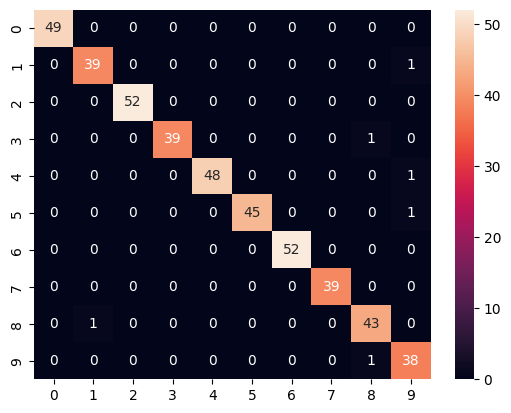

In [1470]:
sns.heatmap(confusion_matrix(results_df["Actual_Predictions"],results_df["log_reg_predictions"]), annot = True)

In [1471]:
from sklearn.model_selection import train_test_split
X, y= load_digits(return_X_y=True)
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [1472]:
from sklearn.metrics import classification_report, confusion_matrix

In [1473]:
forest_params = [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14))}]

clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [1474]:
best_model = LogisticRegression({'dual':False, 'penalty': '12'})

In [1475]:
# Train the best model with the data
best_model.fit

<bound method LogisticRegression.fit of LogisticRegression(penalty={'dual': False, 'penalty': '12'})>

In [1476]:
best_model = LogisticRegression(penalty = "12", dual=False)

In [1477]:
best_model.fit

<bound method LogisticRegression.fit of LogisticRegression(penalty='12')>

In [1478]:
X_train, X_test, y_train, y_test 

(array([[ 0.,  0.,  5., ..., 11.,  1.,  0.],
        [ 0.,  2., 16., ..., 12.,  7.,  0.],
        [ 0.,  0.,  1., ...,  4.,  0.,  0.],
        ...,
        [ 0.,  1., 15., ...,  5.,  1.,  0.],
        [ 0.,  0., 11., ..., 16.,  4.,  0.],
        [ 0.,  0., 10., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  5., ...,  4.,  0.,  0.],
        [ 0.,  2., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  7.,  0.],
        ...,
        [ 0.,  0.,  4., ...,  8.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([9, 2, 3, ..., 2, 3, 8]),
 array([1, 5, 6, 5, 1, 1, 3, 2, 9, 3, 1, 7, 4, 7, 0, 5, 8, 4, 4, 1, 4, 3,
        6, 4, 8, 6, 6, 4, 1, 2, 5, 7, 3, 8, 7, 0, 4, 9, 8, 2, 4, 9, 5, 9,
        4, 5, 2, 5, 0, 3, 5, 1, 1, 3, 2, 7, 6, 3, 6, 1, 2, 9, 8, 8, 0, 9,
        1, 9, 9, 9, 6, 3, 8, 4, 8, 9, 4, 4, 6, 7, 7, 2, 5, 5, 0, 4, 6, 8,
        9, 9, 0, 7, 0, 8, 0, 0, 7, 6, 5, 5, 0, 3, 4, 6, 7, 3, 0, 4, 8, 1,
        3, 4, 7, 1, 7, 4, 5

In [1479]:
print(accuracy_score)

<function accuracy_score at 0x7f15cd0b3490>


In [1480]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [1481]:
print(clf.best_params_)


{'C': 10, 'kernel': 'rbf'}


In [1482]:
clf.best_score_

0.9888668594244802

**Support Vector Classifier**

In [1483]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_test)

In [1484]:
svc_predictions.shape

(450,)

In [1485]:
svc_predictions_train = model_svc.predict(X_train)


In [1486]:
accuracy_score(y_train,svc_predictions_train)*100

99.62880475129919

In [1487]:
accuracy_score(y_test,svc_predictions)*100

98.66666666666667

In [1488]:
df = pd.DataFrame(data)

In [1489]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":predictions_log_reg,
                           "svm_predictions":svc_predictions,
                           "_predictions":naive_bayes_classifier})

In [1490]:
results_df

,Actual_Predictions,log_reg_predictions,svm_predictions,_predictions
0,1,6,1,MultinomialNB()
1,5,3,5,MultinomialNB()
2,6,9,6,MultinomialNB()
3,5,8,5,MultinomialNB()
4,1,2,1,MultinomialNB()
...,...,...,...,...
445,0,9,0,MultinomialNB()
446,8,4,8,MultinomialNB()
447,8,7,8,MultinomialNB()
448,7,7,7,MultinomialNB()


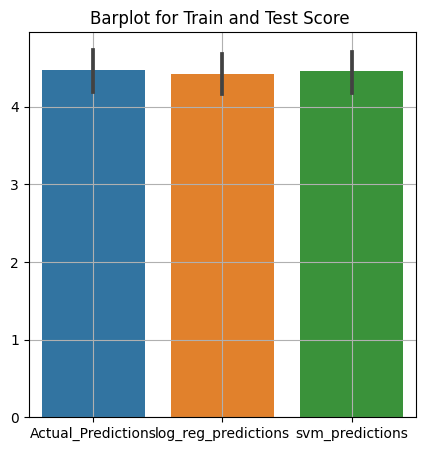

In [1491]:
plt.figure(figsize = [5,5])
for col in ["Train and Test Score"]:
  sns.barplot(data = results_df),
  plt.grid();
  plt.title("Barplot for {} ".format(col))
  plt.show();

**Precision and Recall**

In [1492]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [1493]:
from sklearn.model_selection import train_test_split
X, y= load_digits(return_X_y=True)
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [1494]:
y_pred = clf.predict(X_test)


In [1495]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy    :", accuracy)

Accuracy    : 1.0


In [1496]:
from sklearn.metrics import classification_report

In [1497]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        49
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        51
           9       1.00      1.00      1.00        36

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



In [1498]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [1499]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [1500]:
fpr = {}
tpr = {}
thresh = {}

n_class = 3

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
  

**ROC AUC Curve**

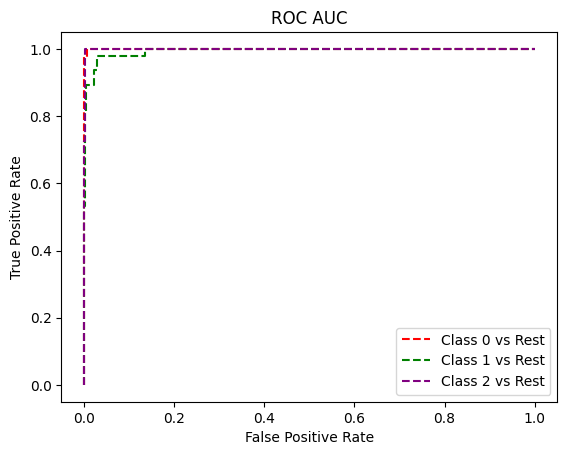

In [1501]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='purple', label='Class 2 vs Rest')
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
